*Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?*

*Партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.*

План работы:

1)Загрузить данные и подготовить их к анализу

2)Анализ данных

3)Общий вывод

4)Подготовка презентации

## Загрузить данные и подготовить их к анализу

### Загрузить данные о заведениях общественного питания Москвы. Убедиться, что тип данных в каждой колонке — правильный, а также отсутствуют пропущенные значения и дубликаты. При необходимости обработать их

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re

data = pd.read_csv('/datasets/rest_data.csv')
pd.set_option("max_colwidth", 95)
data

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское шоссе, 22-й километр, домовладение 4, строение 1",36


In [2]:
#переведем значения столбца object_name в нижний регистр, поскольку многие сетевые заведения могут иметь разное по написанию названия
data['object_name'] = data['object_name'].str.lower()
pd.set_option("max_colwidth", 95)
data

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское шоссе, 22-й километр, домовладение 4, строение 1",36


In [3]:
#выведем описательную статистику данных
data.describe()

,id,number
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000


In [4]:
#узнаем типы данных каждого столбца и есть ли пропущенные значения
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [5]:
#проверим таблицу на дубликаты
data.duplicated().sum()

0

## Анализ данных

### Исследовать соотношение видов объектов общественного питания по количеству. Построить график.

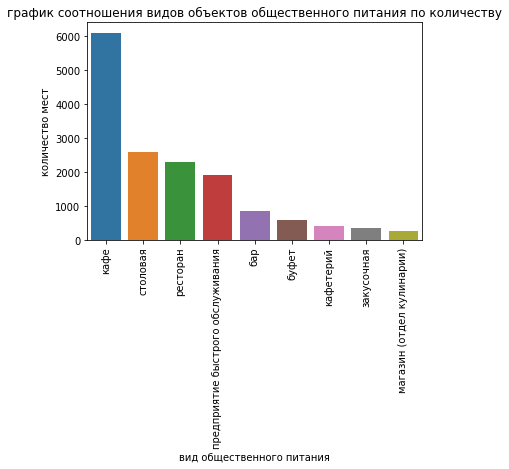

In [6]:
lp = data.groupby('object_type')['object_name'].count().sort_values(ascending=False).reset_index()
ax = sns.barplot(x="object_type", y="object_name", data=lp)
plt.title('график соотношения видов объектов общественного питания по количеству')
plt.xlabel('вид общественного питания')
plt.ylabel('количество мест')
degrees = 90
plt.xticks(rotation=degrees)
plt.show()

*Первую тройку по вместимости занимают кафе, столовые и рестораны. Формат данных заведений предрасполагает большое количество посадочных мест, тем самым окупает затраты. Меньше всего мест в магазинах и закусочных. В таких типах общепита мало мест для приема пищи, да и формат этому не соответствует*

### Исследовать соотношение сетевых и несетевых заведений по количеству. Построить график.

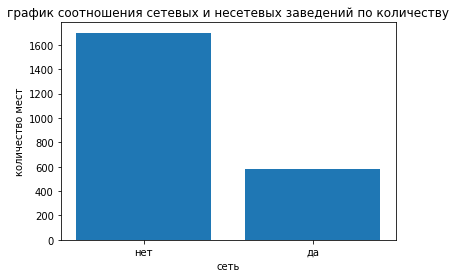

In [7]:
plt.bar(data['chain'],data['number'])
plt.title('график соотношения сетевых и несетевых заведений по количеству')
plt.xlabel('сеть')
plt.ylabel('количество мест')
plt.show()

*Сетевые заведения в 2,5 раза проигрывают. Скорее всего, сетевые предприятия имеют формат кафе, закусочных или кафетериев.*

### Для какого вида объекта общественного питания характерно сетевое распространение?

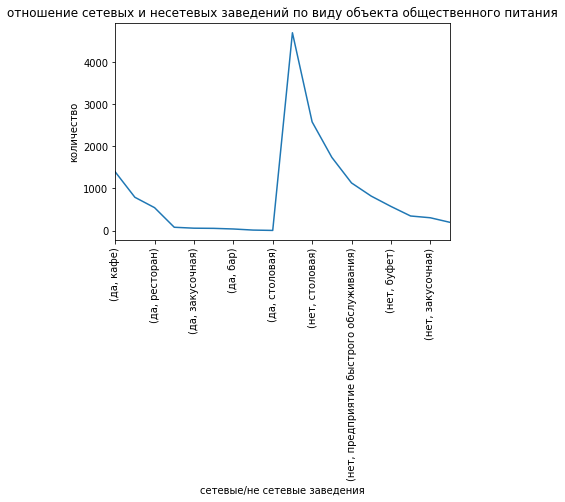

In [8]:
data.groupby('chain')['object_type'].value_counts().plot()
plt.title('отношение сетевых и несетевых заведений по виду объекта общественного питания')
plt.xlabel('сетевые/не сетевые заведения')
plt.ylabel('количество')
degrees = 90
plt.xticks(rotation=degrees)
plt.show()

### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [9]:
chain = data.query('chain == "да"')
chain

,id,object_name,chain,object_type,address,number
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
6,148815,брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
13,22579,алло пицца,да,кафе,"город Москва, улица Авиаторов, дом 14",32
16,144107,суши wok,да,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7
18,58565,тануки,да,ресторан,"город Москва, Большая Академическая улица, дом 65",160
...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское шоссе, 22-й километр, домовладение 4, строение 1",36


In [10]:
chain_grouped = (chain.groupby(['object_name']).agg({'number': ['count', 'median']}).reset_index())
chain_grouped.columns = ['object_name', 'object_count', 'number_median']
chain_grouped

,object_name,object_count,number_median
0,beverly hills diner,1,88.0
1,bierloga,1,75.0
2,black & white,1,40.0
3,bocconcino,3,68.0
4,boobo,1,46.0
...,...,...,...
572,ямми микс,1,2.0
573,ян примус,1,300.0
574,японский ресторан «ваби-саби»,1,155.0
575,япоша,2,105.0


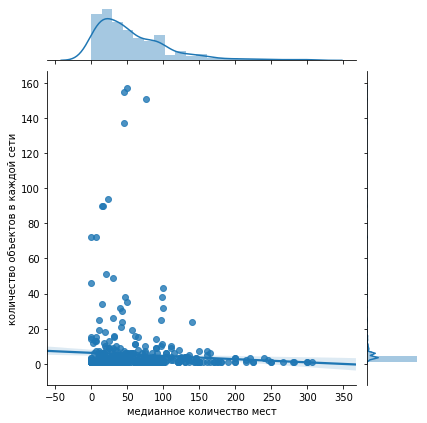

In [11]:
sns.jointplot(data=chain_grouped, x="number_median", y="object_count", kind="reg");
plt.xlabel('медианное количество мест')
plt.ylabel('количество объектов в каждой сети')
plt.show()

*Чем больше количество посадочных мест, тем меньше объектов в сети. Это хорошо отражает диаграмма.*

### Для каждого вида объекта общественного питания описать среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Построить графики.

In [12]:
df_mean = data.groupby('object_type')['number'].mean().reset_index().sort_values(by = 'number', ascending=False)
df_mean

,object_type,number
8,столовая,130.246618
7,ресторан,96.834136
1,буфет,51.129915
0,бар,43.494159
3,кафе,39.716019
6,предприятие быстрого обслуживания,20.552262
4,кафетерий,9.123116
2,закусочная,7.608333
5,магазин (отдел кулинарии),5.589744


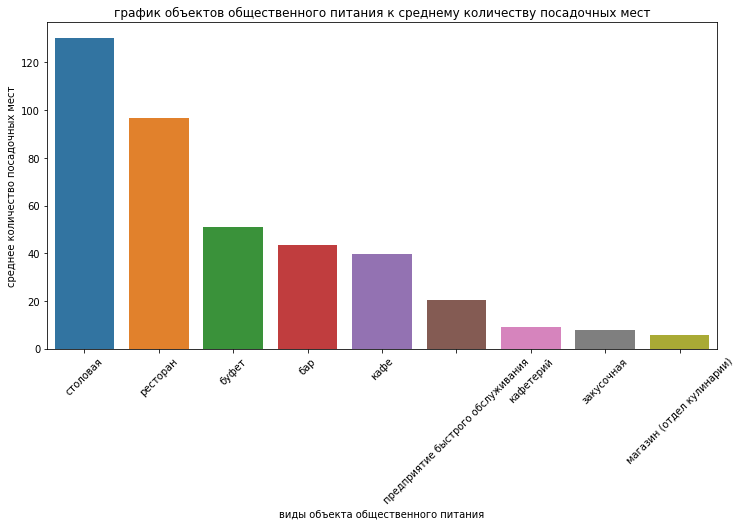

In [13]:
plot_order = data.sort_values(by='object_type', ascending=False).number.values
plt.figure(figsize=(12, 6))
g = sns.barplot(x='object_type', y='number', data=df_mean);
g.set(xlabel="виды объекта общественного питания", ylabel="среднее количество посадочных мест");
title = ('график объектов общественного питания к среднему количеству посадочных мест')
g.set(title=title);
plt.xticks(rotation=45);

*В среднем самое большое количество посадочных мест предостовляют столовые (130) обгоняя рестораны (96). Характерно, что они занимают 3е место по количеству мест в целом. Столовые общирны, а цены ниже ресторанных, поэтому большую часть помещения заставляют посадочными местами*

### Выделить в отдельный столбец информацию об улице из столбца address 

In [14]:
def get_street(address):
    result = re.search(',(.+?),', address)
    if result:
        found=result.group(1)
        return found
    return 'error'
data['street'] = data['address'].apply(get_street) 
data

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское шоссе, 22-й километр, домовладение 4, строение 1",36,поселение Московский


### Построить график топ-10 улиц по количеству объектов общественного питания. Воспользоваться внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [15]:
topname = data.groupby('street').agg({'object_name':'count'}).reset_index().sort_values(by='object_name', ascending=False)
topname

,street,object_name
1331,город Зеленоград,232
1440,проспект Мира,204
993,Профсоюзная улица,182
683,Ленинградский проспект,171
979,Пресненская набережная,167
...,...,...
1340,дом 1,1
1342,дом 118Б,1
1343,дом 11А,1
1344,дом 16,1


In [16]:
topname = topname[1:11]
topname

,street,object_name
1440,проспект Мира,204
993,Профсоюзная улица,182
683,Ленинградский проспект,171
979,Пресненская набережная,167
407,Варшавское шоссе,161
686,Ленинский проспект,147
1407,поселение Сосенское,138
1437,проспект Вернадского,132
674,Кутузовский проспект,114
600,Каширское шоссе,112


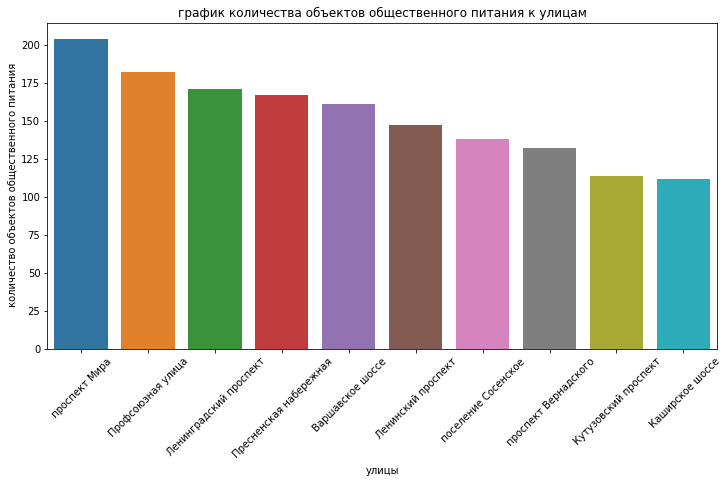

In [17]:
plt.figure(figsize=(12, 6))
g = sns.barplot(x='street', y='object_name', data=topname);
g.set(xlabel="улицы", ylabel=" количество объектов общественного питания");
title = ('график количества объектов общественного питания к улицам')
g.set(title=title);
plt.xticks(rotation=45);

*По полученным данным большего всего объектов общественного питания на проспекте Мира, как в этом топе, так и в городе в целом.*

In [18]:
#далее необходимо узнать районы города в которых находяться улицы из нашего топа. Для этого обратимся к API Яндекс.Карты
API_URL = 'https://geocode-maps.yandex.ru/1.x'


token = '7ea0a4d5-e5be-4c85-b41a-bb2a10211f1b'

In [19]:
#получим координаты района и сверим с Яндекс.Карты
params = {
    'geocode': 'город Москва, проспект Мира',
    'format': 'json',
    'apikey': token
    }
r = requests.get(API_URL, params=params)
#получаем координаты по улице
coordinates = r.json()['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos']

params = {
    'geocode': ','.join(coordinates.split(' ')),
    'format': 'json',
    'apikey': token
    }

r = requests.get(API_URL, params=params)
#получаем район по координатам
district = r.json()['response']['GeoObjectCollection']['featureMember'][1]['GeoObject']['metaDataProperty']['GeocoderMetaData']
district

{'precision': 'other',
 'text': 'Россия, Москва, Северо-Восточный административный округ, Алексеевский район',
 'kind': 'district',
 'Address': {'country_code': 'RU',
  'formatted': 'Россия, Москва, Северо-Восточный административный округ, Алексеевский район',
  'Components': [{'kind': 'country', 'name': 'Россия'},
   {'kind': 'province', 'name': 'Центральный федеральный округ'},
   {'kind': 'province', 'name': 'Москва'},
   {'kind': 'locality', 'name': 'Москва'},
   {'kind': 'district', 'name': 'Северо-Восточный административный округ'},
   {'kind': 'district', 'name': 'Алексеевский район'}]},
 'AddressDetails': {'Country': {'AddressLine': 'Россия, Москва, Северо-Восточный административный округ, Алексеевский район',
   'CountryNameCode': 'RU',
   'CountryName': 'Россия',
   'AdministrativeArea': {'AdministrativeAreaName': 'Москва',
    'Locality': {'LocalityName': 'Москва',
     'DependentLocality': {'DependentLocalityName': 'Северо-Восточный административный округ',
      'Dependent

*Проспект Мира, согласно Яндекс.Картам, находиться в Алексеевском районе*

In [20]:
params = {
    'geocode': 'город Москва, Профсоюзная улица',
    'format': 'json',
    'apikey': token
    }
r = requests.get(API_URL, params=params)
coordinates = r.json()['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos']

params = {
    'geocode': ','.join(coordinates.split(' ')),
    'format': 'json',
    'apikey': token
    }

r = requests.get(API_URL, params=params)
district = r.json()['response']['GeoObjectCollection']['featureMember'][1]['GeoObject']['metaDataProperty']['GeocoderMetaData']
district

{'precision': 'other',
 'text': 'Россия, Москва, Юго-Западный административный округ, район Коньково, 1-й микрорайон',
 'kind': 'district',
 'Address': {'country_code': 'RU',
  'formatted': 'Россия, Москва, Юго-Западный административный округ, район Коньково, 1-й микрорайон',
  'Components': [{'kind': 'country', 'name': 'Россия'},
   {'kind': 'province', 'name': 'Центральный федеральный округ'},
   {'kind': 'province', 'name': 'Москва'},
   {'kind': 'locality', 'name': 'Москва'},
   {'kind': 'district', 'name': 'Юго-Западный административный округ'},
   {'kind': 'district', 'name': 'район Коньково'},
   {'kind': 'district', 'name': '1-й микрорайон'}]},
 'AddressDetails': {'Country': {'AddressLine': 'Россия, Москва, Юго-Западный административный округ, район Коньково, 1-й микрорайон',
   'CountryNameCode': 'RU',
   'CountryName': 'Россия',
   'AdministrativeArea': {'AdministrativeAreaName': 'Москва',
    'Locality': {'LocalityName': 'Москва',
     'DependentLocality': {'DependentLocalit

*Профсоюзная улица, согласно Яндекс.Картам, находиться в районе Коньково*

In [21]:
params = {
    'geocode': 'город Москва, Ленинградский проспект',
    'format': 'json',
    'apikey': token
    }
r = requests.get(API_URL, params=params)
coordinates = r.json()['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos']

params = {
    'geocode': ','.join(coordinates.split(' ')),
    'format': 'json',
    'apikey': token
    }

r = requests.get(API_URL, params=params)
district = r.json()['response']['GeoObjectCollection']['featureMember'][1]['GeoObject']['metaDataProperty']['GeocoderMetaData']
district

{'precision': 'other',
 'text': 'Россия, Москва, Северный административный округ, Хорошёвский район',
 'kind': 'district',
 'Address': {'country_code': 'RU',
  'formatted': 'Россия, Москва, Северный административный округ, Хорошёвский район',
  'Components': [{'kind': 'country', 'name': 'Россия'},
   {'kind': 'province', 'name': 'Центральный федеральный округ'},
   {'kind': 'province', 'name': 'Москва'},
   {'kind': 'locality', 'name': 'Москва'},
   {'kind': 'district', 'name': 'Северный административный округ'},
   {'kind': 'district', 'name': 'Хорошёвский район'}]},
 'AddressDetails': {'Country': {'AddressLine': 'Россия, Москва, Северный административный округ, Хорошёвский район',
   'CountryNameCode': 'RU',
   'CountryName': 'Россия',
   'AdministrativeArea': {'AdministrativeAreaName': 'Москва',
    'Locality': {'LocalityName': 'Москва',
     'DependentLocality': {'DependentLocalityName': 'Северный административный округ',
      'DependentLocality': {'DependentLocalityName': 'Хорошё

*Ленинградский проспект, согласно Яндекс.Картам, находиться в Хорошёвском районе*

In [22]:
params = {
    'geocode': 'город Москва, Пресненская набережная',
    'format': 'json',
    'apikey': token
    }
r = requests.get(API_URL, params=params)
coordinates = r.json()['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos']

params = {
    'geocode': ','.join(coordinates.split(' ')),
    'format': 'json',
    'apikey': token
    }

r = requests.get(API_URL, params=params)
district = r.json()['response']['GeoObjectCollection']['featureMember'][1]['GeoObject']['metaDataProperty']['GeocoderMetaData']
district

{'precision': 'other',
 'text': 'Россия, Москва, Центральный административный округ, Пресненский район, Московский международный деловой центр Москва-Сити',
 'kind': 'district',
 'Address': {'country_code': 'RU',
  'formatted': 'Россия, Москва, Центральный административный округ, Пресненский район, Московский международный деловой центр Москва-Сити',
  'Components': [{'kind': 'country', 'name': 'Россия'},
   {'kind': 'province', 'name': 'Центральный федеральный округ'},
   {'kind': 'province', 'name': 'Москва'},
   {'kind': 'locality', 'name': 'Москва'},
   {'kind': 'district', 'name': 'Центральный административный округ'},
   {'kind': 'district', 'name': 'Пресненский район'},
   {'kind': 'district',
    'name': 'Московский международный деловой центр Москва-Сити'}]},
 'AddressDetails': {'Country': {'AddressLine': 'Россия, Москва, Центральный административный округ, Пресненский район, Московский международный деловой центр Москва-Сити',
   'CountryNameCode': 'RU',
   'CountryName': 'Ро

*Пресненская набережная, согласно Яндекс.Картам, находиться в Пресненском районе*

In [23]:
params = {
    'geocode': 'город Москва, Варшавское шоссе',
    'format': 'json',
    'apikey': token
    }
r = requests.get(API_URL, params=params)
coordinates = r.json()['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos']

params = {
    'geocode': ','.join(coordinates.split(' ')),
    'format': 'json',
    'apikey': token
    }

r = requests.get(API_URL, params=params)
district = r.json()['response']['GeoObjectCollection']['featureMember'][1]['GeoObject']['metaDataProperty']['GeocoderMetaData']
district

{'precision': 'other',
 'text': 'Россия, Москва, Южный административный округ, район Чертаново Южное',
 'kind': 'district',
 'Address': {'country_code': 'RU',
  'formatted': 'Россия, Москва, Южный административный округ, район Чертаново Южное',
  'Components': [{'kind': 'country', 'name': 'Россия'},
   {'kind': 'province', 'name': 'Центральный федеральный округ'},
   {'kind': 'province', 'name': 'Москва'},
   {'kind': 'locality', 'name': 'Москва'},
   {'kind': 'district', 'name': 'Южный административный округ'},
   {'kind': 'district', 'name': 'район Чертаново Южное'}]},
 'AddressDetails': {'Country': {'AddressLine': 'Россия, Москва, Южный административный округ, район Чертаново Южное',
   'CountryNameCode': 'RU',
   'CountryName': 'Россия',
   'AdministrativeArea': {'AdministrativeAreaName': 'Москва',
    'Locality': {'LocalityName': 'Москва',
     'DependentLocality': {'DependentLocalityName': 'Южный административный округ',
      'DependentLocality': {'DependentLocalityName': 'район

*Варшавское шоссе, согласно Яндекс.Картам, находиться в районе Чертаново Южное*

In [24]:
params = {
    'geocode': 'город Москва, Ленинский проспект',
    'format': 'json',
    'apikey': token
    }
r = requests.get(API_URL, params=params)
coordinates = r.json()['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos']

params = {
    'geocode': ','.join(coordinates.split(' ')),
    'format': 'json',
    'apikey': token
    }

r = requests.get(API_URL, params=params)
district = r.json()['response']['GeoObjectCollection']['featureMember'][1]['GeoObject']['metaDataProperty']['GeocoderMetaData']
district

{'precision': 'other',
 'text': 'Россия, Москва, Юго-Западный административный округ, Ломоносовский район',
 'kind': 'district',
 'Address': {'country_code': 'RU',
  'formatted': 'Россия, Москва, Юго-Западный административный округ, Ломоносовский район',
  'Components': [{'kind': 'country', 'name': 'Россия'},
   {'kind': 'province', 'name': 'Центральный федеральный округ'},
   {'kind': 'province', 'name': 'Москва'},
   {'kind': 'locality', 'name': 'Москва'},
   {'kind': 'district', 'name': 'Юго-Западный административный округ'},
   {'kind': 'district', 'name': 'Ломоносовский район'}]},
 'AddressDetails': {'Country': {'AddressLine': 'Россия, Москва, Юго-Западный административный округ, Ломоносовский район',
   'CountryNameCode': 'RU',
   'CountryName': 'Россия',
   'AdministrativeArea': {'AdministrativeAreaName': 'Москва',
    'Locality': {'LocalityName': 'Москва',
     'DependentLocality': {'DependentLocalityName': 'Юго-Западный административный округ',
      'DependentLocality': {'Dep

*Варшавское шоссе, согласно Яндекс.Картам, находиться в Ломоносовском районе*

In [25]:
params = {
    'geocode': 'город Москва, поселение Сосенское',
    'format': 'json',
    'apikey': token
    }
r = requests.get(API_URL, params=params)
coordinates = r.json()['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos']

params = {
    'geocode': ','.join(coordinates.split(' ')),
    'format': 'json',
    'apikey': token
    }

r = requests.get(API_URL, params=params)
district = r.json()['response']['GeoObjectCollection']['featureMember'][1]['GeoObject']['metaDataProperty']['GeocoderMetaData']
district

{'precision': 'other',
 'text': 'Россия, Москва, поселение Сосенское, административно-деловой центр Коммунарка',
 'kind': 'district',
 'Address': {'country_code': 'RU',
  'formatted': 'Россия, Москва, поселение Сосенское, административно-деловой центр Коммунарка',
  'Components': [{'kind': 'country', 'name': 'Россия'},
   {'kind': 'province', 'name': 'Центральный федеральный округ'},
   {'kind': 'province', 'name': 'Москва'},
   {'kind': 'area', 'name': 'Новомосковский административный округ'},
   {'kind': 'area', 'name': 'поселение Сосенское'},
   {'kind': 'district', 'name': 'административно-деловой центр Коммунарка'}]},
 'AddressDetails': {'Country': {'AddressLine': 'Россия, Москва, поселение Сосенское, административно-деловой центр Коммунарка',
   'CountryNameCode': 'RU',
   'CountryName': 'Россия',
   'AdministrativeArea': {'AdministrativeAreaName': 'Москва',
    'SubAdministrativeArea': {'SubAdministrativeAreaName': 'Новомосковский административный округ',
     'Locality': {'Depe

*поселение Сосенское, согласно Яндекс.Картам, находиться в административно-деловом центре Коммунарка*

In [26]:
params = {
    'geocode': 'город Москва, проспект Вернадского',
    'format': 'json',
    'apikey': token
    }
r = requests.get(API_URL, params=params)
coordinates = r.json()['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos']

params = {
    'geocode': ','.join(coordinates.split(' ')),
    'format': 'json',
    'apikey': token
    }

r = requests.get(API_URL, params=params)
district = r.json()['response']['GeoObjectCollection']['featureMember'][1]['GeoObject']['metaDataProperty']['GeocoderMetaData']
district

{'precision': 'other',
 'text': 'Россия, Москва, Юго-Западный административный округ, Ломоносовский район',
 'kind': 'district',
 'Address': {'country_code': 'RU',
  'formatted': 'Россия, Москва, Юго-Западный административный округ, Ломоносовский район',
  'Components': [{'kind': 'country', 'name': 'Россия'},
   {'kind': 'province', 'name': 'Центральный федеральный округ'},
   {'kind': 'province', 'name': 'Москва'},
   {'kind': 'locality', 'name': 'Москва'},
   {'kind': 'district', 'name': 'Юго-Западный административный округ'},
   {'kind': 'district', 'name': 'Ломоносовский район'}]},
 'AddressDetails': {'Country': {'AddressLine': 'Россия, Москва, Юго-Западный административный округ, Ломоносовский район',
   'CountryNameCode': 'RU',
   'CountryName': 'Россия',
   'AdministrativeArea': {'AdministrativeAreaName': 'Москва',
    'Locality': {'LocalityName': 'Москва',
     'DependentLocality': {'DependentLocalityName': 'Юго-Западный административный округ',
      'DependentLocality': {'Dep

*проспект Вернадского, согласно Яндекс.Картам, находиться в Ломоносовском районе*

In [27]:
params = {
    'geocode': 'город Москва, Кутузовский проспект',
    'format': 'json',
    'apikey': token
    }
r = requests.get(API_URL, params=params)
coordinates = r.json()['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos']

params = {
    'geocode': ','.join(coordinates.split(' ')),
    'format': 'json',
    'apikey': token
    }

r = requests.get(API_URL, params=params)
district = r.json()['response']['GeoObjectCollection']['featureMember'][1]['GeoObject']['metaDataProperty']['GeocoderMetaData']
district

{'precision': 'other',
 'text': 'Россия, Москва, Западный административный округ, район Дорогомилово',
 'kind': 'district',
 'Address': {'country_code': 'RU',
  'formatted': 'Россия, Москва, Западный административный округ, район Дорогомилово',
  'Components': [{'kind': 'country', 'name': 'Россия'},
   {'kind': 'province', 'name': 'Центральный федеральный округ'},
   {'kind': 'province', 'name': 'Москва'},
   {'kind': 'locality', 'name': 'Москва'},
   {'kind': 'district', 'name': 'Западный административный округ'},
   {'kind': 'district', 'name': 'район Дорогомилово'}]},
 'AddressDetails': {'Country': {'AddressLine': 'Россия, Москва, Западный административный округ, район Дорогомилово',
   'CountryNameCode': 'RU',
   'CountryName': 'Россия',
   'AdministrativeArea': {'AdministrativeAreaName': 'Москва',
    'Locality': {'LocalityName': 'Москва',
     'DependentLocality': {'DependentLocalityName': 'Западный административный округ',
      'DependentLocality': {'DependentLocalityName': 'ра

*Кутузовский проспект, согласно Яндекс.Картам, находиться в районе Дорогомилово*

In [28]:
params = {
    'geocode': 'город Москва, Каширское шоссе',
    'format': 'json',
    'apikey': token
    }
r = requests.get(API_URL, params=params)
coordinates = r.json()['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos']

params = {
    'geocode': ','.join(coordinates.split(' ')),
    'format': 'json',
    'apikey': token
    }

r = requests.get(API_URL, params=params)
district = r.json()['response']['GeoObjectCollection']['featureMember'][1]['GeoObject']['metaDataProperty']['GeocoderMetaData']
district

{'precision': 'other',
 'text': 'Россия, Москва, Южный административный округ, район Москворечье-Сабурово, кварталы 1А и 1Б Москворечья',
 'kind': 'district',
 'Address': {'country_code': 'RU',
  'formatted': 'Россия, Москва, Южный административный округ, район Москворечье-Сабурово, кварталы 1А и 1Б Москворечья',
  'Components': [{'kind': 'country', 'name': 'Россия'},
   {'kind': 'province', 'name': 'Центральный федеральный округ'},
   {'kind': 'province', 'name': 'Москва'},
   {'kind': 'locality', 'name': 'Москва'},
   {'kind': 'district', 'name': 'Южный административный округ'},
   {'kind': 'district', 'name': 'район Москворечье-Сабурово'},
   {'kind': 'district', 'name': 'кварталы 1А и 1Б Москворечья'}]},
 'AddressDetails': {'Country': {'AddressLine': 'Россия, Москва, Южный административный округ, район Москворечье-Сабурово, кварталы 1А и 1Б Москворечья',
   'CountryNameCode': 'RU',
   'CountryName': 'Россия',
   'AdministrativeArea': {'AdministrativeAreaName': 'Москва',
    'Locali

*Каширское шоссе, согласно Яндекс.Картам, находиться в районе кварталы 1А и 1Б Москворечья*

### Найти число улиц с одним объектом общественного питания. Воспользоваться внешней информацией и ответить на вопрос — в каких районах Москвы находятся эти улицы?

In [30]:
params = {
    'geocode': 'город Москва, Алымов переулок',
    'format': 'json',
    'apikey': token
    }
r = requests.get(API_URL, params=params)
coordinates = r.json()['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos']

params = {
    'geocode': ','.join(coordinates.split(' ')),
    'format': 'json',
    'apikey': token
    }

r = requests.get(API_URL, params=params)
district = r.json()['response']['GeoObjectCollection']['featureMember'][1]['GeoObject']['metaDataProperty']['GeocoderMetaData']
district

{'precision': 'other',
 'text': 'Россия, Москва, Восточный административный округ, район Богородское',
 'kind': 'district',
 'Address': {'country_code': 'RU',
  'formatted': 'Россия, Москва, Восточный административный округ, район Богородское',
  'Components': [{'kind': 'country', 'name': 'Россия'},
   {'kind': 'province', 'name': 'Центральный федеральный округ'},
   {'kind': 'province', 'name': 'Москва'},
   {'kind': 'locality', 'name': 'Москва'},
   {'kind': 'district', 'name': 'Восточный административный округ'},
   {'kind': 'district', 'name': 'район Богородское'}]},
 'AddressDetails': {'Country': {'AddressLine': 'Россия, Москва, Восточный административный округ, район Богородское',
   'CountryNameCode': 'RU',
   'CountryName': 'Россия',
   'AdministrativeArea': {'AdministrativeAreaName': 'Москва',
    'Locality': {'LocalityName': 'Москва',
     'DependentLocality': {'DependentLocalityName': 'Восточный административный округ',
      'DependentLocality': {'DependentLocalityName': 'р

*Алымов переулок, согласно Яндекс.Картам, находиться в районе Богородское*

In [31]:
params = {
    'geocode': 'город Москва, улица Медведева',
    'format': 'json',
    'apikey': token
    }
r = requests.get(API_URL, params=params)
coordinates = r.json()['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos']

params = {
    'geocode': ','.join(coordinates.split(' ')),
    'format': 'json',
    'apikey': token
    }

r = requests.get(API_URL, params=params)
district = r.json()['response']['GeoObjectCollection']['featureMember'][1]['GeoObject']['metaDataProperty']['GeocoderMetaData']
district

{'precision': 'other',
 'text': 'Россия, Москва, Восточный административный округ, район Косино-Ухтомский, микрорайон Кожухово, 6-й, 7-й, 8-й кварталы',
 'kind': 'district',
 'Address': {'country_code': 'RU',
  'formatted': 'Россия, Москва, Восточный административный округ, район Косино-Ухтомский, микрорайон Кожухово, 6-й, 7-й, 8-й кварталы',
  'Components': [{'kind': 'country', 'name': 'Россия'},
   {'kind': 'province', 'name': 'Центральный федеральный округ'},
   {'kind': 'province', 'name': 'Москва'},
   {'kind': 'locality', 'name': 'Москва'},
   {'kind': 'district', 'name': 'Восточный административный округ'},
   {'kind': 'district', 'name': 'район Косино-Ухтомский'},
   {'kind': 'district', 'name': 'микрорайон Кожухово'},
   {'kind': 'district', 'name': '6-й, 7-й, 8-й кварталы'}]},
 'AddressDetails': {'Country': {'AddressLine': 'Россия, Москва, Восточный административный округ, район Косино-Ухтомский, микрорайон Кожухово, 6-й, 7-й, 8-й кварталы',
   'CountryNameCode': 'RU',
   'Co

*улица Медведева, согласно Яндекс.Картам, находиться в районе Косино-Ухтомский*

In [32]:
params = {
    'geocode': 'город Москва, 2-я улица Энтузиастов',
    'format': 'json',
    'apikey': token
    }
r = requests.get(API_URL, params=params)
coordinates = r.json()['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos']

params = {
    'geocode': ','.join(coordinates.split(' ')),
    'format': 'json',
    'apikey': token
    }

r = requests.get(API_URL, params=params)
district = r.json()['response']['GeoObjectCollection']['featureMember'][1]['GeoObject']['metaDataProperty']['GeocoderMetaData']
district

{'precision': 'other',
 'text': 'Россия, Москва, Восточный административный округ, район Перово',
 'kind': 'district',
 'Address': {'country_code': 'RU',
  'formatted': 'Россия, Москва, Восточный административный округ, район Перово',
  'Components': [{'kind': 'country', 'name': 'Россия'},
   {'kind': 'province', 'name': 'Центральный федеральный округ'},
   {'kind': 'province', 'name': 'Москва'},
   {'kind': 'locality', 'name': 'Москва'},
   {'kind': 'district', 'name': 'Восточный административный округ'},
   {'kind': 'district', 'name': 'район Перово'}]},
 'AddressDetails': {'Country': {'AddressLine': 'Россия, Москва, Восточный административный округ, район Перово',
   'CountryNameCode': 'RU',
   'CountryName': 'Россия',
   'AdministrativeArea': {'AdministrativeAreaName': 'Москва',
    'Locality': {'LocalityName': 'Москва',
     'DependentLocality': {'DependentLocalityName': 'Восточный административный округ',
      'DependentLocality': {'DependentLocalityName': 'район Перово'}}}}}}}

*2-я улица Энтузиастов, согласно Яндекс.Картам, находиться в районе Перово*

In [33]:
params = {
    'geocode': 'город Москва, улица Захарьинские Дворики',
    'format': 'json',
    'apikey': token
    }
r = requests.get(API_URL, params=params)
coordinates = r.json()['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos']

params = {
    'geocode': ','.join(coordinates.split(' ')),
    'format': 'json',
    'apikey': token
    }

r = requests.get(API_URL, params=params)
district = r.json()['response']['GeoObjectCollection']['featureMember'][1]['GeoObject']['metaDataProperty']['GeocoderMetaData']
district

{'precision': 'other',
 'text': 'Россия, Москва, Юго-Западный административный округ, район Южное Бутово',
 'kind': 'district',
 'Address': {'country_code': 'RU',
  'formatted': 'Россия, Москва, Юго-Западный административный округ, район Южное Бутово',
  'Components': [{'kind': 'country', 'name': 'Россия'},
   {'kind': 'province', 'name': 'Центральный федеральный округ'},
   {'kind': 'province', 'name': 'Москва'},
   {'kind': 'locality', 'name': 'Москва'},
   {'kind': 'district', 'name': 'Юго-Западный административный округ'},
   {'kind': 'district', 'name': 'район Южное Бутово'}]},
 'AddressDetails': {'Country': {'AddressLine': 'Россия, Москва, Юго-Западный административный округ, район Южное Бутово',
   'CountryNameCode': 'RU',
   'CountryName': 'Россия',
   'AdministrativeArea': {'AdministrativeAreaName': 'Москва',
    'Locality': {'LocalityName': 'Москва',
     'DependentLocality': {'DependentLocalityName': 'Юго-Западный административный округ',
      'DependentLocality': {'Depende

*улица Захарьинские Дворики, согласно Яндекс.Картам, находиться в районе Южное Бутово*

In [34]:
params = {
    'geocode': 'город Москва, Андреево-Забелинская улица',
    'format': 'json',
    'apikey': token
    }
r = requests.get(API_URL, params=params)
coordinates = r.json()['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos']

params = {
    'geocode': ','.join(coordinates.split(' ')),
    'format': 'json',
    'apikey': token
    }

r = requests.get(API_URL, params=params)
district = r.json()['response']['GeoObjectCollection']['featureMember'][1]['GeoObject']['metaDataProperty']['GeocoderMetaData']
district

{'precision': 'other',
 'text': 'Россия, Москва, Восточный административный округ, район Богородское',
 'kind': 'district',
 'Address': {'country_code': 'RU',
  'formatted': 'Россия, Москва, Восточный административный округ, район Богородское',
  'Components': [{'kind': 'country', 'name': 'Россия'},
   {'kind': 'province', 'name': 'Центральный федеральный округ'},
   {'kind': 'province', 'name': 'Москва'},
   {'kind': 'locality', 'name': 'Москва'},
   {'kind': 'district', 'name': 'Восточный административный округ'},
   {'kind': 'district', 'name': 'район Богородское'}]},
 'AddressDetails': {'Country': {'AddressLine': 'Россия, Москва, Восточный административный округ, район Богородское',
   'CountryNameCode': 'RU',
   'CountryName': 'Россия',
   'AdministrativeArea': {'AdministrativeAreaName': 'Москва',
    'Locality': {'LocalityName': 'Москва',
     'DependentLocality': {'DependentLocalityName': 'Восточный административный округ',
      'DependentLocality': {'DependentLocalityName': 'р

*Андреево-Забелинская улица, согласно Яндекс.Картам, находиться в районе Богородское*

In [35]:
params = {
    'geocode': 'город Москва, 3-й Лучевой просек',
    'format': 'json',
    'apikey': token
    }
r = requests.get(API_URL, params=params)
coordinates = r.json()['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos']

params = {
    'geocode': ','.join(coordinates.split(' ')),
    'format': 'json',
    'apikey': token
    }

r = requests.get(API_URL, params=params)
district = r.json()['response']['GeoObjectCollection']['featureMember'][1]['GeoObject']['metaDataProperty']['GeocoderMetaData']
district

{'precision': 'other',
 'text': 'Россия, Москва, парк Сокольники',
 'kind': 'vegetation',
 'Address': {'country_code': 'RU',
  'formatted': 'Россия, Москва, парк Сокольники',
  'Components': [{'kind': 'country', 'name': 'Россия'},
   {'kind': 'province', 'name': 'Центральный федеральный округ'},
   {'kind': 'province', 'name': 'Москва'},
   {'kind': 'locality', 'name': 'Москва'},
   {'kind': 'vegetation', 'name': 'парк Сокольники'}]},
 'AddressDetails': {'Country': {'AddressLine': 'Россия, Москва, парк Сокольники',
   'CountryNameCode': 'RU',
   'CountryName': 'Россия',
   'AdministrativeArea': {'AdministrativeAreaName': 'Москва',
    'Locality': {'LocalityName': 'Москва',
     'Premise': {'PremiseName': 'парк Сокольники'}}}}}}

*3-й Лучевой просек, согласно Яндекс.Картам, находиться в районе парка Сокольники*

In [36]:
params = {
    'geocode': 'город Москва, улица Екатерины Будановой',
    'format': 'json',
    'apikey': token
    }
r = requests.get(API_URL, params=params)
coordinates = r.json()['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos']

params = {
    'geocode': ','.join(coordinates.split(' ')),
    'format': 'json',
    'apikey': token
    }

r = requests.get(API_URL, params=params)
district = r.json()['response']['GeoObjectCollection']['featureMember'][1]['GeoObject']['metaDataProperty']['GeocoderMetaData']
district

{'precision': 'other',
 'text': 'Россия, Москва, Западный административный округ, район Кунцево',
 'kind': 'district',
 'Address': {'country_code': 'RU',
  'formatted': 'Россия, Москва, Западный административный округ, район Кунцево',
  'Components': [{'kind': 'country', 'name': 'Россия'},
   {'kind': 'province', 'name': 'Центральный федеральный округ'},
   {'kind': 'province', 'name': 'Москва'},
   {'kind': 'locality', 'name': 'Москва'},
   {'kind': 'district', 'name': 'Западный административный округ'},
   {'kind': 'district', 'name': 'район Кунцево'}]},
 'AddressDetails': {'Country': {'AddressLine': 'Россия, Москва, Западный административный округ, район Кунцево',
   'CountryNameCode': 'RU',
   'CountryName': 'Россия',
   'AdministrativeArea': {'AdministrativeAreaName': 'Москва',
    'Locality': {'LocalityName': 'Москва',
     'DependentLocality': {'DependentLocalityName': 'Западный административный округ',
      'DependentLocality': {'DependentLocalityName': 'район Кунцево'}}}}}}}

*улица Екатерины Будановой, согласно Яндекс.Картам, находиться в районе Кунцево*

In [37]:
params = {
    'geocode': 'город Москва, улица Можайский Вал',
    'format': 'json',
    'apikey': token
    }
r = requests.get(API_URL, params=params)
coordinates = r.json()['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos']

params = {
    'geocode': ','.join(coordinates.split(' ')),
    'format': 'json',
    'apikey': token
    }

r = requests.get(API_URL, params=params)
district = r.json()['response']['GeoObjectCollection']['featureMember'][1]['GeoObject']['metaDataProperty']['GeocoderMetaData']
district

{'precision': 'other',
 'text': 'Россия, Москва, Западный административный округ, район Дорогомилово',
 'kind': 'district',
 'Address': {'country_code': 'RU',
  'formatted': 'Россия, Москва, Западный административный округ, район Дорогомилово',
  'Components': [{'kind': 'country', 'name': 'Россия'},
   {'kind': 'province', 'name': 'Центральный федеральный округ'},
   {'kind': 'province', 'name': 'Москва'},
   {'kind': 'locality', 'name': 'Москва'},
   {'kind': 'district', 'name': 'Западный административный округ'},
   {'kind': 'district', 'name': 'район Дорогомилово'}]},
 'AddressDetails': {'Country': {'AddressLine': 'Россия, Москва, Западный административный округ, район Дорогомилово',
   'CountryNameCode': 'RU',
   'CountryName': 'Россия',
   'AdministrativeArea': {'AdministrativeAreaName': 'Москва',
    'Locality': {'LocalityName': 'Москва',
     'DependentLocality': {'DependentLocalityName': 'Западный административный округ',
      'DependentLocality': {'DependentLocalityName': 'ра

*улица Можайский Вал, согласно Яндекс.Картам, находиться в районе Дорогомилово*

In [38]:
params = {
    'geocode': 'город Москва, 1-й Николощеповский переулок',
    'format': 'json',
    'apikey': token
    }
r = requests.get(API_URL, params=params)
coordinates = r.json()['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos']

params = {
    'geocode': ','.join(coordinates.split(' ')),
    'format': 'json',
    'apikey': token
    }

r = requests.get(API_URL, params=params)
district = r.json()['response']['GeoObjectCollection']['featureMember'][1]['GeoObject']['metaDataProperty']['GeocoderMetaData']
district

{'precision': 'other',
 'text': 'Россия, Москва, Центральный административный округ, район Арбат, 570-й квартал',
 'kind': 'district',
 'Address': {'country_code': 'RU',
  'formatted': 'Россия, Москва, Центральный административный округ, район Арбат, 570-й квартал',
  'Components': [{'kind': 'country', 'name': 'Россия'},
   {'kind': 'province', 'name': 'Центральный федеральный округ'},
   {'kind': 'province', 'name': 'Москва'},
   {'kind': 'locality', 'name': 'Москва'},
   {'kind': 'district', 'name': 'Центральный административный округ'},
   {'kind': 'district', 'name': 'район Арбат'},
   {'kind': 'district', 'name': '570-й квартал'}]},
 'AddressDetails': {'Country': {'AddressLine': 'Россия, Москва, Центральный административный округ, район Арбат, 570-й квартал',
   'CountryNameCode': 'RU',
   'CountryName': 'Россия',
   'AdministrativeArea': {'AdministrativeAreaName': 'Москва',
    'Locality': {'LocalityName': 'Москва',
     'DependentLocality': {'DependentLocalityName': 'Центральный

*1-й Николощеповский переулок, согласно Яндекс.Картам, находиться в районе Арбат, 570-й квартал*

In [39]:
params = {
    'geocode': 'город Москва, Андроньевская площадь',
    'format': 'json',
    'apikey': token
    }
r = requests.get(API_URL, params=params)
coordinates = r.json()['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos']

params = {
    'geocode': ','.join(coordinates.split(' ')),
    'format': 'json',
    'apikey': token
    }

r = requests.get(API_URL, params=params)
district = r.json()['response']['GeoObjectCollection']['featureMember'][1]['GeoObject']['metaDataProperty']['GeocoderMetaData']
district

{'precision': 'street',
 'text': 'Россия, Москва, Андроньевская площадь',
 'kind': 'street',
 'Address': {'country_code': 'RU',
  'formatted': 'Россия, Москва, Андроньевская площадь',
  'Components': [{'kind': 'country', 'name': 'Россия'},
   {'kind': 'province', 'name': 'Центральный федеральный округ'},
   {'kind': 'province', 'name': 'Москва'},
   {'kind': 'locality', 'name': 'Москва'},
   {'kind': 'street', 'name': 'Андроньевская площадь'}]},
 'AddressDetails': {'Country': {'AddressLine': 'Россия, Москва, Андроньевская площадь',
   'CountryNameCode': 'RU',
   'CountryName': 'Россия',
   'AdministrativeArea': {'AdministrativeAreaName': 'Москва',
    'Locality': {'LocalityName': 'Москва',
     'Thoroughfare': {'ThoroughfareName': 'Андроньевская площадь'}}}}}}

*Андроньевская площадь	, согласно Яндекс.Картам, находиться в Таганском районе*

### Посмотеть на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

In [40]:
data2 = topname.merge(data, on = 'street')
data2

,street,object_name_x,id,object_name_y,chain,object_type,address,number
0,проспект Мира,204,149899,сухарева башня,нет,кафе,"город Москва, проспект Мира, дом 5, корпус 1",10
1,проспект Мира,204,69300,ваби-саби,да,кафе,"город Москва, проспект Мира, дом 29",64
2,проспект Мира,204,71378,шоколадница,да,кафе,"город Москва, проспект Мира, дом 29",40
3,проспект Мира,204,146123,джаганнат,да,кафе,"город Москва, проспект Мира, дом 31",25
4,проспект Мира,204,137644,krispy creme,да,кафе,"город Москва, проспект Мира, дом 40",36
...,...,...,...,...,...,...,...,...
1523,Каширское шоссе,112,217812,интурист коломенское,нет,ресторан,"город Москва, Каширское шоссе, дом 39Б",160
1524,Каширское шоссе,112,220301,"грячие закуски,напитки, поп корн, мороженое,сладости",нет,кафетерий,"город Москва, Каширское шоссе, дом 14",0
1525,Каширское шоссе,112,220765,газпромнефтьцентр,да,кафетерий,"город Москва, Каширское шоссе, владение 57А",17
1526,Каширское шоссе,112,220092,starbucks coffee,да,кафе,"город Москва, Каширское шоссе, дом 14",33


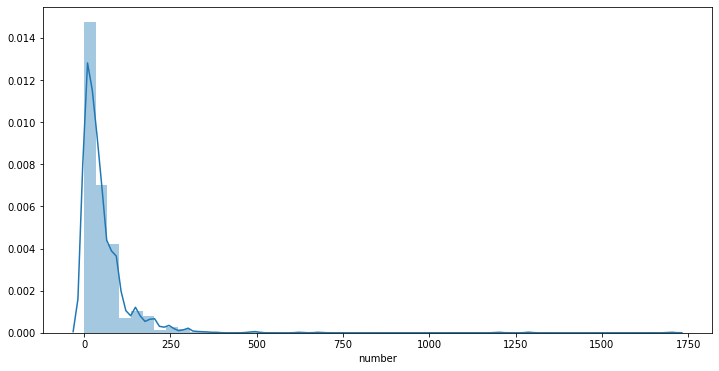

In [41]:
plt.figure(figsize=(12, 6))
sns_plot = sns.distplot(data2['number'])
fig = sns_plot.get_figure()

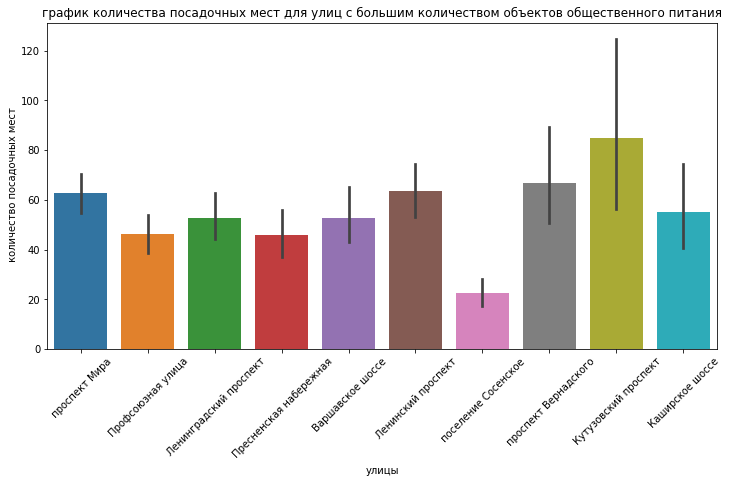

In [42]:
plt.figure(figsize=(12, 6))
g = sns.barplot(x='street', y='number', data=data2);
g.set(xlabel="улицы", ylabel=" количество посадочных мест");
title = ('график количества посадочных мест для улиц с большим количеством объектов общественного питания')
g.set(title=title);
plt.xticks(rotation=45);

In [43]:
data2.query('street == " Кутузовский проспект"')['object_type'].unique()

array(['ресторан', 'бар', 'кафе', 'буфет', 'столовая',
       'магазин (отдел кулинарии)', 'предприятие быстрого обслуживания',
       'закусочная'], dtype=object)

*В общепите на Кутузовском проспекте самое большое количество посадочных мест, но в пункте 2.7 эта улица занимает предпоследнее место. Лидирство связано с тем, что на этой улице много такого тпа общепита, как ресторан, столовая, буфет, бар, имеющих большое количество посадочных мест. Это подтверждает график в пункте 2.5. Также стоит отметить, что это одна из главных центральных улиц города. Из этого можно сделать вывод, что на других улицах другие типы общественного питания распределены более равномерно. Что же до графика распределения посадочных мест, то он указывает на ненормальное распределение, пик данных приблизительно равен 50, также большое количество выбросов после 200.*

## Общий вывод

*Приходя к итогу проделанной работы, можно выделить несколько вариантов бизнеса.*

*Бар,ресторан или столовая имеют большое количество посадочных мест, и в будущем может приносить пропорциональное количество чеков. Таковых заведений много, а значит они зарабатывают, к тому же конкуренция всегда помогает совершенствовать продукт.*

*Второй вариант - это буфет, кафе или предприятие быстрого обслуживания. Их в городе мало,а значит привлечение в данном сегменте будет дешевым,, тем более с роботами, а также разительно ниже конкуренция, чем в первом пункте.*

*Покдлючение к франшизной сети считаю излишним, поскольку их доля невелика. Для развития самостоятельной сети необходимо отладить производство и продукт. Местоположение предлагаю проспект Мира - это одна из центральных улиц с большим количеством заведений, а значит поток клиентов там значительный, только необходимо увеличить посадочных мест больше 60 и делать на это упор в маркетинге.*